--- ACTIVIDAD 1: Detección de Nota Musical ---
Grabando...
Grabación terminada


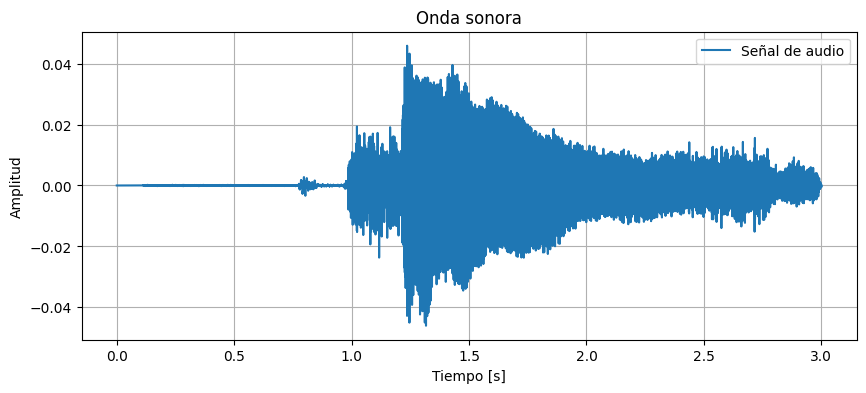

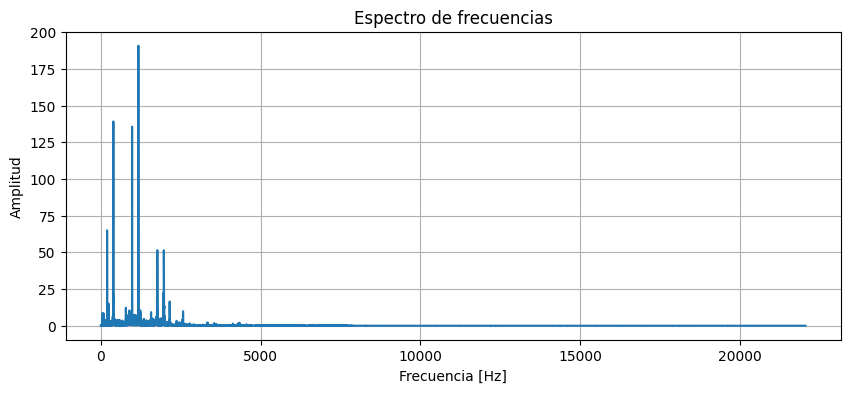

Frecuencias detectadas (primeros 3 armónicos):
   Frecuencia (Hz)    Amplitud
0      1173.666667  190.843704
1       391.000000  139.248535
2       977.000000  135.679764
Frecuencia fundamental estimada: 1173.67 Hz


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fftpack as fft
import sounddevice as sd
import pandas as pd

# Parámetros
DURATION = 3  # segundos
SAMPLE_RATE = 44100  # Hz

def record_audio(duration=DURATION, sample_rate=SAMPLE_RATE):
    print("Grabando...")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()
    print("Grabación terminada")
    return audio.flatten()

def plot_waveform(audio, sample_rate):
    t = np.linspace(0, len(audio) / sample_rate, num=len(audio))
    plt.figure(figsize=(10, 4))
    plt.plot(t, audio, label='Señal de audio')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.title('Onda sonora')
    plt.legend()
    plt.grid()
    plt.show()

def analyze_spectrum(audio, sample_rate):
    N = len(audio)
    freqs = fft.fftfreq(N, 1/sample_rate)
    spectrum = np.abs(fft.fft(audio))
    
    plt.figure(figsize=(10, 4))
    plt.plot(freqs[:N//2], spectrum[:N//2])
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Amplitud')
    plt.title('Espectro de frecuencias')
    plt.grid()
    plt.show()
    
    peaks, _ = signal.find_peaks(spectrum[:N//2], height=max(spectrum[:N//2]) * 0.2)
    harmonics = sorted([(freqs[p], spectrum[p]) for p in peaks], key=lambda x: x[1], reverse=True)[:3]
    
    print("Frecuencias detectadas (primeros 3 armónicos):")
    harmonic_table = pd.DataFrame(harmonics, columns=["Frecuencia (Hz)", "Amplitud"])
    print(harmonic_table)
    
    return harmonics

# Ejecución de Actividad 1
print("--- ACTIVIDAD 1: Detección de Nota Musical ---")
audio = record_audio()
plot_waveform(audio, SAMPLE_RATE)
harmonics = analyze_spectrum(audio, SAMPLE_RATE)
fundamental_freq = harmonics[0][0] if harmonics else 0
print(f'Frecuencia fundamental estimada: {fundamental_freq:.2f} Hz')


--- ACTIVIDAD 2: Análisis de Acordes ---
Capturando acorde...
Grabando...
Grabación terminada


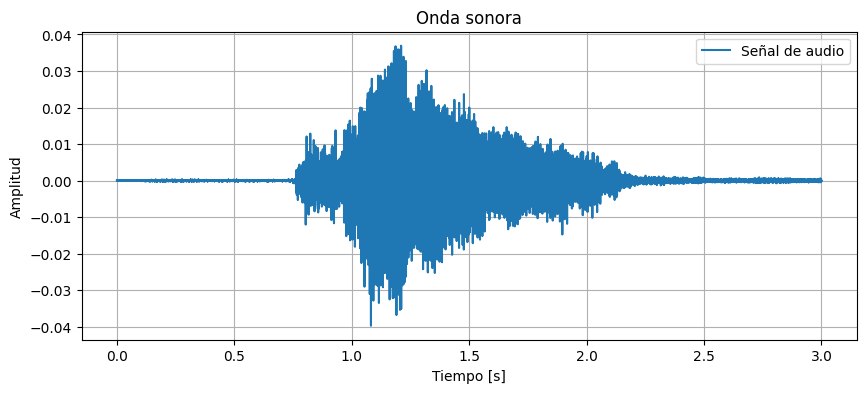

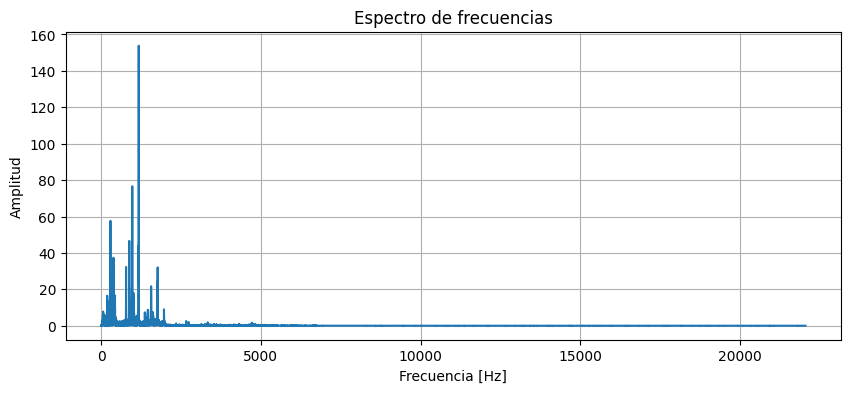

Frecuencias detectadas (primeros 3 armónicos):
   Frecuencia (Hz)    Amplitud
0      1180.666667  153.816849
1       978.000000   76.612434
2       295.000000   57.606815


In [23]:
def analyze_chord():
    print("Capturando acorde...")
    audio = record_audio()
    plot_waveform(audio, SAMPLE_RATE)
    harmonics = analyze_spectrum(audio, SAMPLE_RATE)
    return harmonics

# Ejecución de Actividad 2
print("--- ACTIVIDAD 2: Análisis de Acordes ---")
chord_harmonics = analyze_chord()


--- ACTIVIDAD 3: Predicción de Longitud de Cuerda ---
Capturando nueva frecuencia...
Grabando...
Grabación terminada


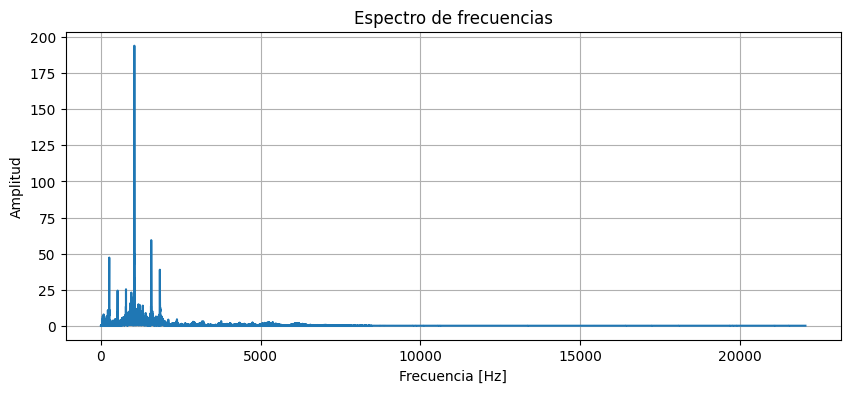

Frecuencias detectadas (primeros 3 armónicos):
   Frecuencia (Hz)    Amplitud
0      1047.666667  194.053818
1      1045.666667   59.671124
2      1576.000000   59.304871
Nueva longitud de cuerda estimada: 0.723 m


In [24]:
def calculate_string_length(initial_length, fundamental_freq, new_audio):
    new_harmonics = analyze_spectrum(new_audio, SAMPLE_RATE)
    new_freq = new_harmonics[0][0] if new_harmonics else 0
    new_length = initial_length * (fundamental_freq / new_freq)
    print(f'Nueva longitud de cuerda estimada: {new_length:.3f} m')
    return new_length

# Ejecución de Actividad 3
print("--- ACTIVIDAD 3: Predicción de Longitud de Cuerda ---")
initial_length = float(input("Ingrese la longitud inicial de la cuerda (m): "))
print("Capturando nueva frecuencia...")
new_audio = record_audio()
new_length = calculate_string_length(initial_length, fundamental_freq, new_audio)



Cuerda 1:
  🎯 Tensión calculada: 117.46 N

Cuerda 2:
  🎯 Tensión calculada: 75.84 N

Cuerda 3:
  🎯 Tensión calculada: 62.63 N

Cuerda 4:
  🎯 Tensión calculada: 53.75 N

Cuerda 5:
  🎯 Tensión calculada: 40.27 N

Cuerda 6:
  🎯 Tensión calculada: 33.90 N


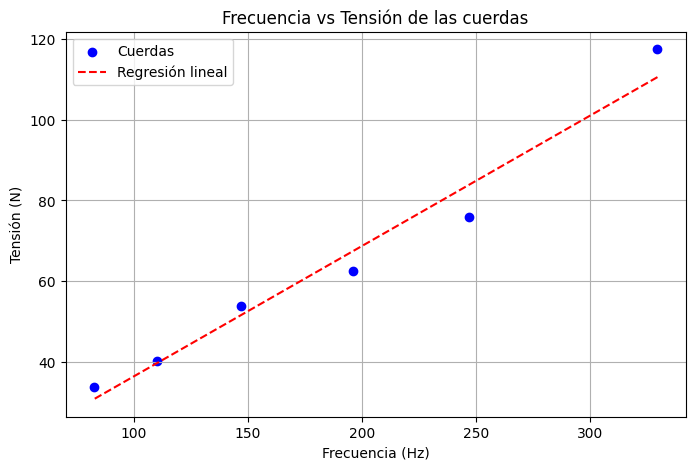

Ecuación de la regresión: Tensión = 0.3227 * Frecuencia + 4.1758
Coeficiente de correlación (R²): 0.9672


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def analyze_tension():
    n = int(input("Ingrese el número de cuerdas: "))
    freqs = []
    tensions = []
    
    for i in range(1, n + 1):
        print(f"\nCuerda {i}:")
        mu = float(input("  Ingrese la densidad lineal de masa (kg/m): "))
        v = float(input("  Ingrese la velocidad de propagación de la onda (m/s): "))
        f = float(input("  Ingrese la frecuencia de la nota musical (Hz): "))
        
        # Calcula la tensión: T = μ * v²
        tension = mu * v**2
        print(f"  🎯 Tensión calculada: {tension:.2f} N")
        
        freqs.append(f)
        tensions.append(tension)
    
    # Convertir listas a arrays de numpy
    freqs = np.array(freqs)
    tensions = np.array(tensions)
    
    # Ajuste de regresión lineal
    slope, intercept, r_value, p_value, std_err = linregress(freqs, tensions)
    reg_line = slope * freqs + intercept  # Línea de regresión

    # Graficar los datos
    plt.figure(figsize=(8, 5))
    plt.scatter(freqs, tensions, color='b', label="Cuerdas")
    plt.plot(freqs, reg_line, color='r', linestyle='--', label="Regresión lineal")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Tensión (N)")
    plt.title("Frecuencia vs Tensión de las cuerdas")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Mostrar ecuación de la recta
    print(f"Ecuación de la regresión: Tensión = {slope:.4f} * Frecuencia + {intercept:.4f}")
    print(f"Coeficiente de correlación (R²): {r_value**2:.4f}")

# Ejecutar la actividad 4 de forma independiente
analyze_tension()


    

